<a href="https://colab.research.google.com/github/Santhosh-1801/DL/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
IMAGE_SHAPE=(224,224)
classifier= tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,)) 
])

In [4]:
goldfish=Image.open('/content/sample_data/goldfish.jfif').resize(IMAGE_SHAPE)


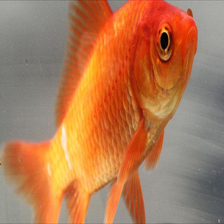

In [5]:
goldfish

In [6]:
goldfish=np.array(goldfish)/255.0

In [7]:
goldfish

array([[[0.57254902, 0.58039216, 0.56078431],
        [0.57647059, 0.58431373, 0.56470588],
        [0.57254902, 0.58039216, 0.56078431],
        ...,
        [0.61176471, 0.61568627, 0.59607843],
        [0.60392157, 0.60784314, 0.58823529],
        [0.61568627, 0.61960784, 0.6       ]],

       [[0.64313725, 0.65098039, 0.63137255],
        [0.64313725, 0.65098039, 0.63137255],
        [0.64705882, 0.65490196, 0.63529412],
        ...,
        [0.66666667, 0.67058824, 0.65098039],
        [0.6745098 , 0.67843137, 0.65882353],
        [0.6745098 , 0.67843137, 0.65882353]],

       [[0.63921569, 0.64705882, 0.62745098],
        [0.64313725, 0.65098039, 0.63137255],
        [0.63921569, 0.64705882, 0.62745098],
        ...,
        [0.65882353, 0.6627451 , 0.64313725],
        [0.65882353, 0.6627451 , 0.64313725],
        [0.65490196, 0.65882353, 0.63921569]],

       ...,

       [[0.59215686, 0.59607843, 0.56470588],
        [0.6       , 0.60392157, 0.57254902],
        [0.59607843, 0

In [8]:
goldfish[np.newaxis, ...]


array([[[[0.57254902, 0.58039216, 0.56078431],
         [0.57647059, 0.58431373, 0.56470588],
         [0.57254902, 0.58039216, 0.56078431],
         ...,
         [0.61176471, 0.61568627, 0.59607843],
         [0.60392157, 0.60784314, 0.58823529],
         [0.61568627, 0.61960784, 0.6       ]],

        [[0.64313725, 0.65098039, 0.63137255],
         [0.64313725, 0.65098039, 0.63137255],
         [0.64705882, 0.65490196, 0.63529412],
         ...,
         [0.66666667, 0.67058824, 0.65098039],
         [0.6745098 , 0.67843137, 0.65882353],
         [0.6745098 , 0.67843137, 0.65882353]],

        [[0.63921569, 0.64705882, 0.62745098],
         [0.64313725, 0.65098039, 0.63137255],
         [0.63921569, 0.64705882, 0.62745098],
         ...,
         [0.65882353, 0.6627451 , 0.64313725],
         [0.65882353, 0.6627451 , 0.64313725],
         [0.65490196, 0.65882353, 0.63921569]],

        ...,

        [[0.59215686, 0.59607843, 0.56470588],
         [0.6       , 0.60392157, 0.57254902]

In [9]:

result = classifier.predict(goldfish[np.newaxis, ...])
result.shape



1/1 [==============================] - 1s 777ms/step


(1, 1001)

In [10]:
predicted_label_index = np.argmax(result)
predicted_label_index


2

In [11]:
image_labels = []
with open("/content/sample_data/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]


['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'goldfish'

In [13]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [14]:
data_dir


'./datasets/flower_photos'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2597655841_07fb2955a4.jpg'),
 PosixPath('datasets/flower_photos/dandelion/23659122395_3467d88c02_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/21657726011_2c94e341bc_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16744522344_8d21b1530d_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/1667963621_c76d570af3_n.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [18]:

roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/527513005_41497ca4dc.jpg'),
 PosixPath('datasets/flower_photos/roses/15859434664_67bf3ef29f.jpg'),
 PosixPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9609569441_eeb8566e94.jpg'),
 PosixPath('datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg')]

In [19]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [21]:
flowers_images_dict['roses'][:5]


[PosixPath('datasets/flower_photos/roses/527513005_41497ca4dc.jpg'),
 PosixPath('datasets/flower_photos/roses/15859434664_67bf3ef29f.jpg'),
 PosixPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9609569441_eeb8566e94.jpg'),
 PosixPath('datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg')]

In [22]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [23]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 99, 116, 149],
        [ 85, 122, 160],
        [ 90, 119, 156]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 96, 105, 142],
        [ 88, 119, 158],
        [ 95, 121, 161]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [101, 102, 140],
        [ 98, 122, 164],
        [102, 127, 169]],

       ...,

       [[ 87,  99, 101],
        [ 85,  97, 101],
        [ 90, 102, 106],
        ...,
        [112, 127, 136],
        [112, 128, 135],
        [111, 127, 134]],

       [[ 89, 100,  98],
        [ 87, 101, 100],
        [ 89, 104, 107],
        ...,
        [120, 132, 142],
        [118, 133, 142],
        [121, 136, 145]],

       [[ 87,  98,  95],
        [ 86, 100,  98],
        [ 84, 102, 103],
        ...,
        [117, 129, 141],
        [118, 130, 142],
        [122, 136, 148]]

In [24]:
img.shape

(336, 500, 3)

In [25]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [26]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resize_img=cv2.resize(img,IMAGE_SHAPE)
    X.append(resize_img)
    y.append(flowers_labels_dict[flower_name])


In [27]:
X=np.array(X)
y=np.array(y)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

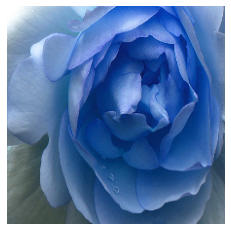

In [30]:
plt.axis('off')
plt.imshow(X[0])

In [31]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 0s 434ms/step


array([795, 795, 795])

In [32]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [171, 193, 225],
        [154, 145, 174],
        [ 88, 120, 159]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [167, 191, 223],
        [170, 164, 195],
        [ 97, 123, 164]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [172, 193, 228],
        [169, 173, 202],
        [ 96, 123, 164]],

       ...,

       [[ 86, 101, 106],
        [ 86,  98, 102],
        [ 85,  98,  98],
        ...,
        [116, 133, 142],
        [115, 133, 142],
        [114, 130, 139]],

       [[ 86,  98, 101],
        [ 89, 102, 105],
        [ 89,  99,  99],
        ...,
        [120, 136, 145],
        [117, 131, 140],
        [113, 129, 137]],

       [[ 87,  99,  97],
        [ 82,  98, 101],
        [ 86,  98,  99],
        ...,
        [119, 132, 140],
        [120, 132, 143],
        [119, 133, 144]]

In [33]:
X[1]

array([[[170, 168, 158],
        [180, 175, 167],
        [175, 171, 166],
        ...,
        [ 38,  39,  40],
        [ 25,  27,  27],
        [ 11,  10,  10]],

       [[169, 167, 158],
        [180, 174, 167],
        [175, 171, 165],
        ...,
        [ 65,  61,  63],
        [ 51,  49,  50],
        [ 34,  31,  31]],

       [[169, 164, 157],
        [179, 172, 166],
        [173, 171, 163],
        ...,
        [ 84,  78,  83],
        [ 69,  67,  69],
        [ 53,  50,  51]],

       ...,

       [[162, 161, 206],
        [164, 163, 202],
        [164, 163, 205],
        ...,
        [ 79,  84,  91],
        [ 77,  79,  89],
        [ 78,  79,  90]],

       [[162, 160, 206],
        [161, 161, 206],
        [139, 144, 181],
        ...,
        [ 73,  76,  85],
        [ 76,  79,  89],
        [ 77,  79,  88]],

       [[160, 160, 205],
        [147, 144, 205],
        [115, 116, 173],
        ...,
        [137, 143, 150],
        [ 75,  81,  90],
        [ 78,  81,  89]]

In [34]:
X[2]

array([[[  8,  22,   4],
        [ 26,  38,  22],
        [ 26,  37,  22],
        ...,
        [ 12,  16,  11],
        [  8,  10,  12],
        [ 15,  16,   8]],

       [[ 17,  32,  14],
        [ 12,  24,   8],
        [ 15,  26,  11],
        ...,
        [  9,   7,  15],
        [ 17,   8,  20],
        [ 16,   9,  10]],

       [[ 24,  42,  22],
        [ 11,  25,   8],
        [ 20,  30,  17],
        ...,
        [  2,   1,   5],
        [  4,  12,  11],
        [  1,  11,   5]],

       ...,

       [[121, 107,  88],
        [132, 116,  96],
        [145, 127, 105],
        ...,
        [ 10,   7,   8],
        [ 15,  17,  15],
        [  4,   7,   6]],

       [[154, 133, 107],
        [169, 149, 119],
        [171, 148, 116],
        ...,
        [  6,   6,   5],
        [ 14,  18,  16],
        [  3,   8,   8]],

       [[172, 149, 117],
        [179, 155, 122],
        [171, 148, 112],
        ...,
        [  1,   2,   0],
        [  3,   6,   5],
        [  0,   1,   2]]

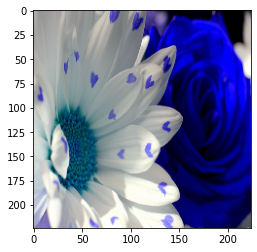

In [35]:
plt.imshow(X[1])

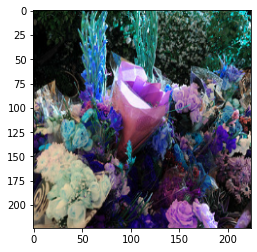

In [36]:
plt.imshow(X[2])

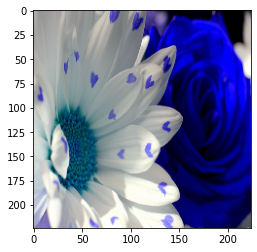

In [37]:
plt.imshow(X[1])

In [38]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [43]:
num_of_flowers=5
model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [46]:
model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5
86/86 [==============================] - 62s 661ms/step - loss: 0.8915 - acc: 0.6628
Epoch 2/5
86/86 [==============================] - 57s 668ms/step - loss: 0.4514 - acc: 0.8448
Epoch 3/5
86/86 [==============================] - 56s 656ms/step - loss: 0.3513 - acc: 0.8775
Epoch 4/5
86/86 [==============================] - 56s 654ms/step - loss: 0.2920 - acc: 0.9052
Epoch 5/5
86/86 [==============================] - 57s 661ms/step - loss: 0.2515 - acc: 0.9237


In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 676ms/step - loss: 0.3671 - acc: 0.8747


[0.36710208654403687, 0.8747276663780212]